In [1]:
from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
train = pd.read_csv('bike_sharing_demand/train.csv')
test = pd.read_csv('bike_sharing_demand/test.csv')
submit = pd.read_csv('bike_sharing_demand/sampleSubmission.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [5]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.6+ KB


In [8]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


特徵工程

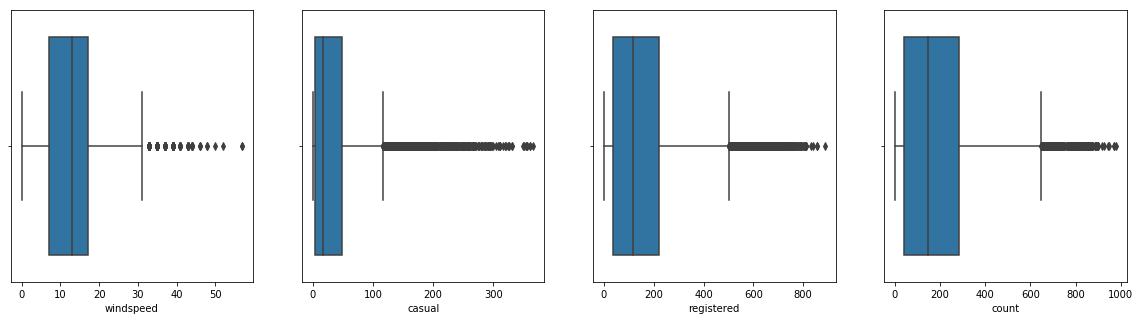

In [9]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.boxplot(x=train['windspeed'])
plt.subplot(1,4,2)
sns.boxplot(x=train['casual'])
plt.subplot(1,4,3)
sns.boxplot(x=train['registered'])
plt.subplot(1,4,4)
sns.boxplot(x=train['count'])
plt.show()

把大於三倍標準差的資料當作 outlier

In [10]:
for i in ['windspeed', 'casual', 'registered', 'count']:
    df = train[np.abs(train[i] - train[i].mean()) > (3 * train[i].std())]
    percentage = len(df)/len(train) * 100
    print('Number of {} outlier={}. It is about {}% of data'.format(i, len(df), round(percentage, 2)))

Number of windspeed outlier=67. It is about 0.62% of data
Number of casual outlier=292. It is about 2.68% of data
Number of registered outlier=235. It is about 2.16% of data
Number of count outlier=147. It is about 1.35% of data


試試看把 outlier 從樣本中刪除

In [11]:
train_casual = train[np.abs(train['casual'] - train['casual'].mean()) <= (3 * train['casual'].std())]
train_registered = train[np.abs(train['registered'] - train['registered'].mean()) <= (3 * train['registered'].std())]
train_count = train[np.abs(train['count'] - train['count'].mean()) <= (3 * train['count'].std())]

In [12]:
print('train shape=', train.shape)
print('train_casual shape=', train_casual.shape)
print('train_registered shape=', train_registered.shape)
print('train_count shape=', train_count.shape)

train shape= (10886, 12)
train_casual shape= (10594, 12)
train_registered shape= (10651, 12)
train_count shape= (10739, 12)


把訓練和測試的資料合併起來

In [13]:
data = train_count.append(test, sort=False)
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [14]:
data.iloc[10734:10744]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4.0,84.0,88.0
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


index 重複了，要改掉

In [15]:
#data.reset_index(inplace=True) # 會保留舊的 index 欄位
data.reset_index(inplace=True, drop=True) # 把舊的 index 欄位丟掉
data.iloc[10734:10744]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10734,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7.0,329.0,336.0
10735,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10.0,231.0,241.0
10736,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4.0,164.0,168.0
10737,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12.0,117.0,129.0
10738,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4.0,84.0,88.0
10739,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,NaN,NaN,NaN
10740,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10741,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,NaN,NaN,NaN
10742,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN
10743,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,NaN,NaN,NaN


先把 datetime 的型態從字串改成 datetime64 再把 datetime index 拆開來


In [16]:
data['datetime'] = pd.to_datetime(data['datetime'])
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 12 columns):
datetime      17232 non-null datetime64[ns]
season        17232 non-null int64
holiday       17232 non-null int64
workingday    17232 non-null int64
weather       17232 non-null int64
temp          17232 non-null float64
atemp         17232 non-null float64
humidity      17232 non-null int64
windspeed     17232 non-null float64
casual        10739 non-null float64
registered    10739 non-null float64
count         10739 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(5)
memory usage: 1.6 MB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [17]:
data['Year'] = data['datetime'].dt.year
data['Month'] = data['datetime'].dt.month
data['date'] = data['datetime'].dt.date
data['hour'] = data['datetime'].dt.hour
data['weekday'] = data['datetime'].dt.weekday
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,2011-01-01,4,5


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


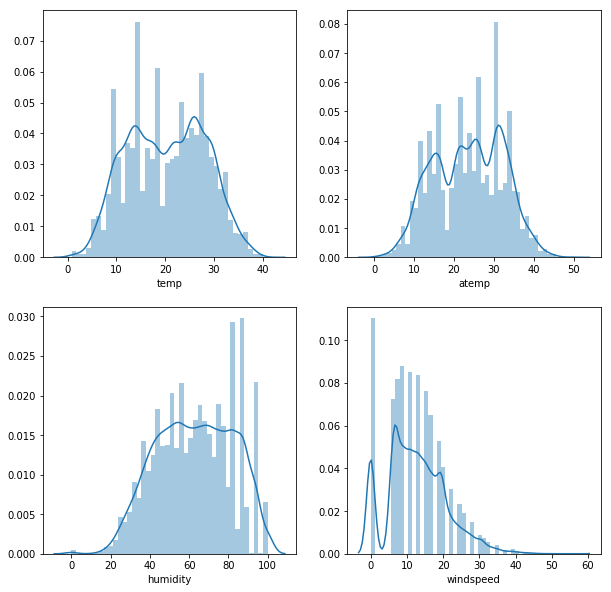

In [18]:
fig, axes = plt.subplots(2, 2)
fig.set_size_inches(10, 10)
sns.distplot(data['temp'], ax=axes[0][0])
sns.distplot(data['atemp'], ax=axes[0][1])
sns.distplot(data['humidity'], ax=axes[1][0])
sns.distplot(data['windspeed'], ax=axes[1][1])
plt.show()

用 風速!=0 的資料來重新估計 風速=0 的資料的真正風速

In [19]:
data_wind_0 = data[data['windspeed'] == 0]
data_wind_0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011,1,2011-01-01,4,5


In [20]:
data_wind_not_0 = data[data['windspeed'] != 0]
data_wind_not_0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011,1,2011-01-01,5,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011,1,2011-01-01,10,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011,1,2011-01-01,11,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011,1,2011-01-01,12,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011,1,2011-01-01,13,5


In [21]:
from sklearn.model_selection import train_test_split
wind_column = ['season', 'weather', 'temp', 'atemp', 'humidity', 'Year', 'Month']
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(data_wind_not_0[wind_column],
                                                                        data_wind_not_0['windspeed'],
                                                                        test_size=0.3,
                                                                        random_state=42)

In [22]:
rf_wind = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_wind.fit(X_train_wind, y_train_wind)
y_pred_wind = rf_wind.predict(X_test_wind)
rf_wind.score(X_test_wind, y_test_wind)

0.41298073797123314

雖然正確性有點低，不過還是拿來估計 風速=0 的資料

In [23]:
new_windspeed = rf_wind.predict(data_wind_0[wind_column])
data_wind_0.loc[:,'windspeed'] = new_windspeed
data_wind_0.head()

/usr/local/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,7.372911,3.0,13.0,16.0,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,7.203689,8.0,32.0,40.0,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,7.203689,5.0,27.0,32.0,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.371841,3.0,10.0,13.0,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.371841,0.0,1.0,1.0,2011,1,2011-01-01,4,5


In [24]:
data_wind = pd.concat([data_wind_0, data_wind_not_0])
data_wind.head()
data_wind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17232 entries, 0 to 17231
Data columns (total 17 columns):
datetime      17232 non-null datetime64[ns]
season        17232 non-null int64
holiday       17232 non-null int64
workingday    17232 non-null int64
weather       17232 non-null int64
temp          17232 non-null float64
atemp         17232 non-null float64
humidity      17232 non-null int64
windspeed     17232 non-null float64
casual        10739 non-null float64
registered    10739 non-null float64
count         10739 non-null float64
Year          17232 non-null int64
Month         17232 non-null int64
date          17232 non-null object
hour          17232 non-null int64
weekday       17232 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(9), object(1)
memory usage: 2.4+ MB


看看新的風速分佈圖

/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


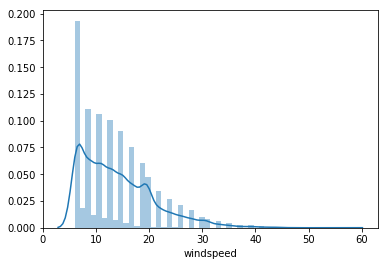

In [25]:
sns.distplot(data_wind['windspeed'])
plt.show()

In [28]:
data_wind_train = data_wind[~data_wind['count'].isnull()]
data_wind_train.info()
data_wind_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10739 entries, 0 to 10738
Data columns (total 17 columns):
datetime      10739 non-null datetime64[ns]
season        10739 non-null int64
holiday       10739 non-null int64
workingday    10739 non-null int64
weather       10739 non-null int64
temp          10739 non-null float64
atemp         10739 non-null float64
humidity      10739 non-null int64
windspeed     10739 non-null float64
casual        10739 non-null float64
registered    10739 non-null float64
count         10739 non-null float64
Year          10739 non-null int64
Month         10739 non-null int64
date          10739 non-null object
hour          10739 non-null int64
weekday       10739 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(9), object(1)
memory usage: 1.5+ MB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,7.372911,3.0,13.0,16.0,2011,1,2011-01-01,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,7.203689,8.0,32.0,40.0,2011,1,2011-01-01,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,7.203689,5.0,27.0,32.0,2011,1,2011-01-01,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,7.371841,3.0,10.0,13.0,2011,1,2011-01-01,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,7.371841,0.0,1.0,1.0,2011,1,2011-01-01,4,5


In [30]:
data_wind_test = data_wind[data_wind['count'].isnull()]
data_wind_test.info()
data_wind_test.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6493 entries, 10740 to 17231
Data columns (total 17 columns):
datetime      6493 non-null datetime64[ns]
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
casual        0 non-null float64
registered    0 non-null float64
count         0 non-null float64
Year          6493 non-null int64
Month         6493 non-null int64
date          6493 non-null object
hour          6493 non-null int64
weekday       6493 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(9), object(1)
memory usage: 913.1+ KB


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,date,hour,weekday
10740,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,8.832318,NaN,NaN,NaN,2011,1,2011-01-20,1,3
10741,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,8.832318,NaN,NaN,NaN,2011,1,2011-01-20,2,3
10751,2011-01-20 12:00:00,1,0,1,2,12.30,16.665,42,7.014312,NaN,NaN,NaN,2011,1,2011-01-20,12,3
10799,2011-01-22 13:00:00,1,0,0,1,3.28,8.335,35,8.539045,NaN,NaN,NaN,2011,1,2011-01-22,13,5
10801,2011-01-22 15:00:00,1,0,0,1,4.92,7.575,28,12.609395,NaN,NaN,NaN,2011,1,2011-01-22,15,5


/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/usr/local/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


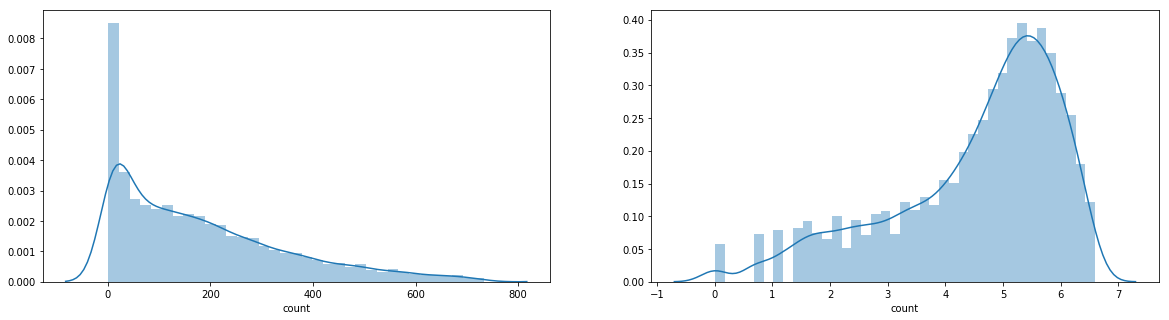

In [33]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(data_wind_train['count'])
plt.subplot(1,2,2)
sns.distplot(np.log(data_wind_train['count']))
plt.show()

訓練模型

In [36]:
rf_count = RandomForestRegressor(n_estimators=1000, random_state=42)
features = ['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'Year', 'Month', 'weekday']

X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(data_wind_train[features],
                                                                            data_wind_train['count'],
                                                                            test_size=0.3,
                                                                            random_state=42)

rf_count.fit(X_train_count, y_train_count)
rf_count.score(X_test_count, y_test_count)

0.42180171209751594

預測結果

In [37]:
X_test = data_wind_test[features]
y_pred = rf_count.predict(X_test)

In [38]:
print(y_pred)

[ 87.85216667  87.85216667 110.02429762 ... 182.5004      99.21244762
 174.96471429]


輸出 csv

In [39]:
submit.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [41]:
output = pd.DataFrame({'datetime':data_wind_test['datetime'], 'count':y_pred})
output.head()

,datetime,count
10740,2011-01-20 01:00:00,87.852167
10741,2011-01-20 02:00:00,87.852167
10751,2011-01-20 12:00:00,110.024298
10799,2011-01-22 13:00:00,88.054000
10801,2011-01-22 15:00:00,67.814500


In [42]:
output.to_csv('submit_bike.csv', index=False)